In [1]:
# IST 718 Group Project - Recordable Incidents and Near Misses in the Workplace
# Kim Greene, Teng Siong Yeap, Brandon Croarkin, and Amanda Sausville


# import packages needed for analysis
import pandas as pd  # data frame operations
from pandas import ExcelWriter
from pandas import ExcelFile
 
Incidents = pd.read_excel('Incidents_and_NearMisses.xlsx', sheet_name='Sheet1')
incidentsDF = pd.DataFrame(Incidents)
incidentsDF.head()

,IncidentNo,IncidentType,CompanyName,Location,DateofOccurrence,YearofOccurrence,IncidentSummary,Area,IncidentDescription,InjuryDescripti,...,DaysonJobTransf,EmpIDCalc,InjustStatus,OccupationofInjured,OperationAtTimeofInjury,OSHARecordable,SBP,SOCCaption,SOCValue,MISS_PotentialImpact
0,130,Sprain,Company D,"Midland, TX",2013-04-21,2013,I.E. was pushing kelly hose off to the driller...,Rig Floor,I.E. was pushing kelly hose off to the driller...,contusions to those areas from slipping and st...,...,0,10711.0,First Aid,MOTOR_DRILLING,Rigging Down,0.0,Back (Lower),Texas,TX,NaN
1,131,Strain,Company D,"Rices Landing, PA",2013-04-05,2013,ee slipped on bottom step of stairs from mud t...,Stairs / Ladders,ee slipped on bottom step of stairs from mud t...,Strain to neck as a result of catching himself...,...,0,10713.0,First Aid,DERRICK_DRILLING,Well Control / BOP,0.0,Neck,West Virginia,WV,NaN
2,132,Strain,Company E,"Williston, ND",2013-04-18,2013,Ee was pulling back a stand of tubing while in...,Derrick / Mast,Ee was pulling back a stand of tubing while in...,Pain and stiffness in lower to middle right si...,...,0,21651.0,No Medical,DERRICK_WELL,Laying Down / Picking Up Pipe / Tubulars,0.0,Back (Lower),North Dakota,ND,NaN
3,136,Fracture,Company D,"Corpus Christi, TX",2013-04-04,2013,Ee's right ring fnger was caught between bushi...,Rig Floor,Ee's right ring fnger was caught between bushi...,Fracture of right ring finger as a result of f...,...,8,7025.0,Restricted Work Case,MOTOR_DRILLING,Making Connection,1.0,Finger,Texas,TX,NaN
4,138,Strain,Company E,"Williston, ND",2013-04-16,2013,Crew was rigging down the floor. Travis was li...,Rig Floor,Crew was rigging down the floor. Travis was li...,"Pain in upper back between shoulder blades, mo...",...,0,21065.0,First Aid,OPERATOR_WELL,Rigging Down,0.0,Back (Upper),North Dakota,ND,NaN


In [2]:
print(incidentsDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 23 columns):
IncidentNo                 3678 non-null int64
IncidentType               3678 non-null object
CompanyName                3678 non-null object
Location                   3678 non-null object
DateofOccurrence           3678 non-null datetime64[ns]
YearofOccurrence           3678 non-null int64
IncidentSummary            3678 non-null object
Area                       3678 non-null object
IncidentDescription        3678 non-null object
InjuryDescripti            1951 non-null object
DateHiredCalc              1952 non-null datetime64[ns]
YearsatCompany             3678 non-null float64
DaysAwayFromWor            3678 non-null int64
DaysonJobTransf            3678 non-null int64
EmpIDCalc                  1952 non-null float64
InjustStatus               1952 non-null object
OccupationofInjured        1944 non-null object
OperationAtTimeofInjury    1952 non-null object
OSHARecordable 

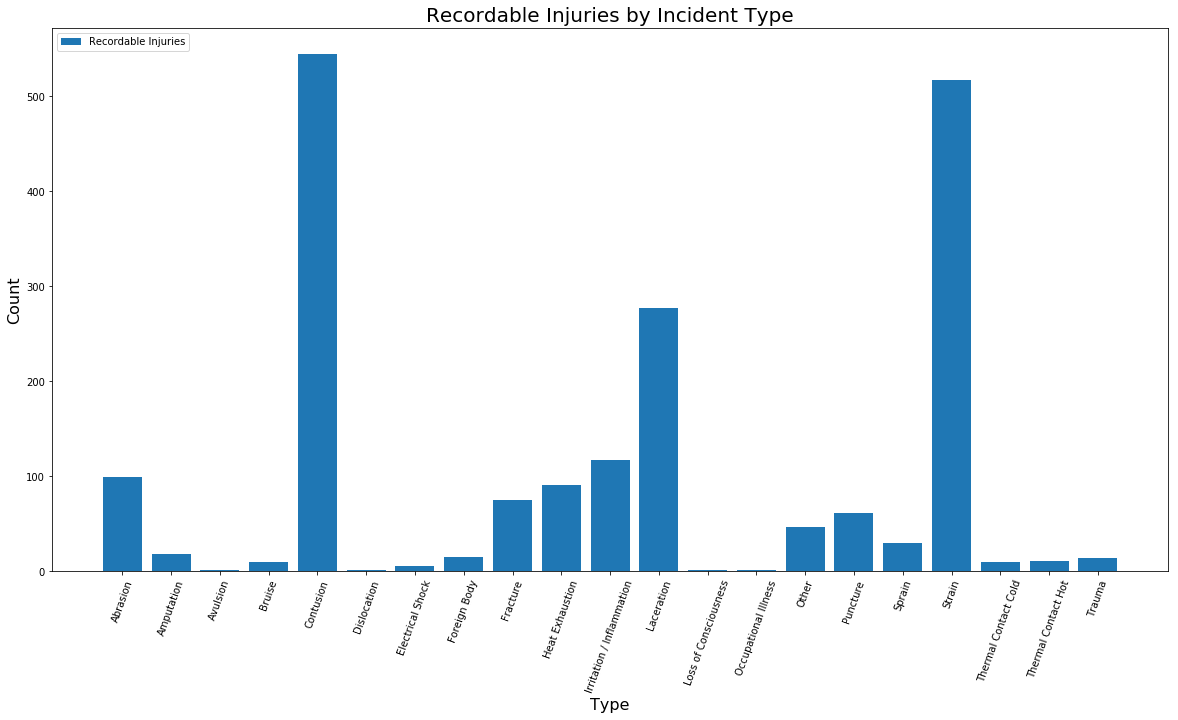

In [4]:
import pandasql as pdsql
pysql = lambda q: pdsql.sqldf(q, globals())
from matplotlib.pylab import plt

# Create bar plot showing injuries by Incident Type
q = """SELECT IncidentType, Count(*) [Recordable Injuries] from incidentsDF where IncidentType <> 'Near Miss' group by IncidentType;"""
inctypeDF = pysql(q)

x = inctypeDF['IncidentType']
y= inctypeDF['Recordable Injuries']

plt.figure(figsize=(20,10))
plt.bar(x,y, label='Recordable Injuries')
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
plt.legend(loc='upper left')
plt.title('Recordable Injuries by Incident Type', fontsize=20)
plt.xlabel('Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()


In [47]:
#create dataframe showing injury trend by company

q = """SELECT distinct YearofOccurrence from incidentsDF order by YearofOccurrence;"""
yearsdf = pysql(q)

q = """SELECT CompanyName, count(*) [InjuryCount], YearofOccurrence from incidentsDF  group by CompanyName, YearofOccurrence order by YearofOccurrence;"""
trend1df = pysql(q)

q = """SELECT a.YearofOccurrence, CASE WHEN b.CompanyName='Company A' THEN InjuryCount Else 0 END [CompanyA] ,
        CASE WHEN b.CompanyName='Company B' THEN InjuryCount Else 0 END [CompanyB],
        CASE WHEN b.CompanyName='Company C' THEN InjuryCount Else 0 END [CompanyC],
        CASE WHEN b.CompanyName='Company D' THEN InjuryCount Else 0 END [CompanyD],
        CASE WHEN b.CompanyName='Company E' THEN InjuryCount Else 0 END [CompanyE],
        CASE WHEN b.CompanyName='Company F' THEN InjuryCount Else 0 END [CompanyF]
        FROM yearsdf a left join trend1df b on a.YearofOccurrence=b.YearofOccurrence;"""
trend2df = pysql(q)

q="""SELECT YearofOccurrence, SUM(CompanyA) [CompanyA], SUM(CompanyB) [CompanyB], SUM(CompanyC) [CompanyC],
        SUM(CompanyD) [CompanyD], SUM(CompanyE) [CompanyE], SUM(CompanyF) [CompanyF] from trend2df GROUP BY YearofOccurrence;"""
Trenddf = pysql(q)

#drop 2019 as it's not a complete year
Trenddf = Trenddf.drop(Trenddf[Trenddf.YearofOccurrence == 2019].index)
Trenddf

,YearofOccurrence,CompanyA,CompanyB,CompanyC,CompanyD,CompanyE,CompanyF
0,2013,6,6,23,443,151,71
1,2014,2,3,26,690,264,121
2,2015,0,2,27,215,138,70
3,2016,1,1,20,250,88,129
4,2017,0,3,17,140,90,156
5,2018,0,1,15,139,124,196


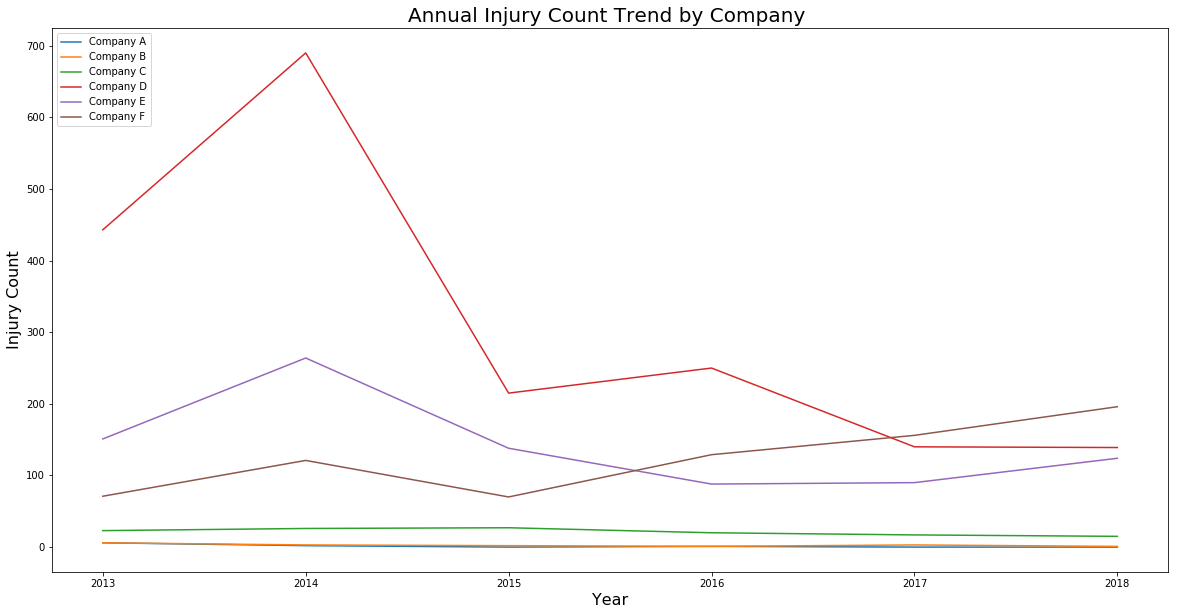

In [48]:
x = Trenddf['YearofOccurrence']
Y1 = Trenddf['CompanyA']
Y2 = Trenddf['CompanyB']
Y3 = Trenddf['CompanyC']
Y4 = Trenddf['CompanyD']
Y5 = Trenddf['CompanyE']
Y6 = Trenddf['CompanyF']

plt.figure(figsize=(20,10))
plt.plot(x,Y1, label='Company A')
plt.plot(x,Y2, label='Company B')
plt.plot(x,Y3, label='Company C')
plt.plot(x,Y4, label='Company D')
plt.plot(x,Y5, label='Company E')
plt.plot(x,Y6, label='Company F')

plt.legend(loc='upper left')
plt.title('Annual Injury Count Trend by Company ', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Injury Count', fontsize=16)
plt.show()
